<a href="https://colab.research.google.com/github/aakashyadav24/Internship-Projects/blob/main/3Skill_WineQualityPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction – End-to-End Machine Learning Project


## TASK 1: Load and Understand the Dataset




1. Import the required Python libraries:
• pandas
• numpy
• seaborn
• matplotlib
• scikit-learn
2. Load the dataset using pd.read_csv().
3. Display the dataset to understand its structure:
• Show the first 5 rows using head()
• Show the last 5 rows using tail()
• Show random rows using sample()
4. Write a short explanation:
• What type of data is present?
• What does each row represent?



In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load the dataset

df = pd.read_csv('/content/sample_data/winequality.csv', sep=',')

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nLast 5 rows of the dataset:")
print(df.tail())

print("\n5 random rows of the dataset:")
print(df.sample(5))


First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8  

The dataset `winequality.csv` contains various chemical properties of red wines and their quality ratings.

**Data Types Present:**
All columns in the dataset are numerical (float or integer types). Specifically:
*   **Fixed acidity, Volatile acidity, Citric acid, Residual sugar, Chlorides, Free sulfur dioxide, Total sulfur dioxide, Density, pH, Sulphates, Alcohol**: These columns represent various chemical properties of the wine and are continuous numerical features (float).
*   **Quality**: This column represents the quality rating of the wine, which is an integer ranging from 3 to 8.

**What each row represents:**
Each row in the DataFrame `df` represents a unique sample of red wine. The values in each column for a given row describe the measured chemical attributes of that specific wine sample, along with its overall quality rating.

## TASK 2: Basic Data Inspection

Using Python code, answer the following questions:
• What are the column names in the dataset?
• How many rows and columns are there?
• What is the data type of each column?
• Display summary statistics using describe()

After running the code, write a short explanation:
• Why is data inspection important before training any ML model?


In [27]:
print("Column Names:")
print(df.columns)

print("\nShape of the DataFrame (Rows, Columns):")
print(df.shape)

print("\nData Types of Each Column:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

Column Names:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Shape of the DataFrame (Rows, Columns):
(1599, 12)

Data Types of Each Column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphat

Data inspection is a critical first step before training any machine learning model for several reasons:

1.  **Understanding Data Characteristics**: It provides an initial understanding of the dataset's structure, features, and target variable. This includes grasping the scale, distribution, and general patterns within the data.
2.  **Identifying Potential Issues**: Through inspection, one can identify various problems that could negatively impact model performance:
    *   **Incorrect Data Types**: Features might be loaded with inappropriate data types (e.g., numbers as strings), requiring conversion.
    *   **Missing Values**: Missing data can cause errors or bias in models. Inspection helps locate these gaps and guide imputation or removal strategies.
    *   **Outliers**: Extreme values can skew statistical analyses and model training. Identifying them is crucial for deciding whether to remove, transform, or cap them.
    *   **Inconsistent Data**: Errors in data entry or collection can lead to inconsistencies (e.g., different spellings for the same category), which need to be standardized.
    *   **Scale Differences**: Features often have different ranges of values. Inspection highlights these differences, indicating the need for scaling techniques (e.g., standardization or normalization) to ensure fair treatment by algorithms.
3.  **Guiding Preprocessing Steps**: The insights gained from data inspection directly inform subsequent data preprocessing steps. For instance, knowing about outliers might lead to robust scaling methods, and understanding data distributions might guide transformation choices (e.g., logarithmic transformations for skewed data).
4.  **Feature Engineering Opportunities**: By understanding the relationships and characteristics of features, one can identify opportunities for creating new, more informative features (feature engineering).
5.  **Preventing Model Bias**: Unaddressed data issues can lead to biased models that perform poorly on new, unseen data. Thorough inspection helps mitigate these risks, leading to more robust and reliable models.

## TASK 3: Missing Values Analysis

Steps to perform:
1. Check missing values using:
• isnull()
• isnull().sum()
2. Answer the following:
• Are there any missing values in the dataset?
• If missing values were present, how would you handle them in a real-world Machine Learning project?

In [28]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Based on the output from `df.isnull().sum()`, there are **no missing values** present in the `winequality.csv` dataset. Each column shows a count of `0` for missing values.

### Handling Missing Values in a Real-World Machine Learning Project:

Common strategies for handling missing values include:

1.  **Removal:**
    *   **Row-wise Deletion (`df.dropna()`):** If a small percentage of rows have missing values, deleting those rows might be acceptable. This is suitable when missingness is random and the amount of data lost is negligible. However, it can lead to significant data loss if many rows have missing values.
    *   **Column-wise Deletion (`df.drop()`):** If a column has a very high percentage of missing values (e.g., >70-80%), it might be best to drop the entire column, as it provides little information. This is an extreme measure and should be used cautiously.

2.  **Imputation:** Replacing missing values with estimated ones.
    *   **Mean/Median Imputation:** Replace missing numerical values with the mean or median of the respective column. The mean is sensitive to outliers, while the median is more robust. This is a simple and common method but can reduce variance and distort relationships if not used carefully.
    *   **Mode Imputation:** Replace missing categorical values with the mode (most frequent value) of the column. It can also be used for numerical data, especially if it's discrete.
    *   **Forward Fill / Backward Fill (`df.fillna(method='ffill')`, `df.fillna(method='bfill')`):** Fill missing values with the previous or next valid observation. This is often used in time-series data.
    *   **Regression Imputation:** Predict missing values using a regression model based on other features in the dataset. This is more sophisticated but can be computationally intensive and assumes relationships between variables.
    *   **K-Nearest Neighbors (KNN) Imputation:** Impute missing values based on the values of the k-nearest neighbors in the dataset. This can capture complex relationships but is also more computationally expensive.


## TASK 4: Exploratory Data Analysis (EDA)

Perform EDA on the quality column.
1. Print the value counts of different quality scores.
2. Plot a count plot for the quality variable.
3. Write 2–3 observations based on the plot.

Explain:
• What does this graph tell you about the dataset?
• How does EDA help before model training?


Value counts for 'quality' column:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


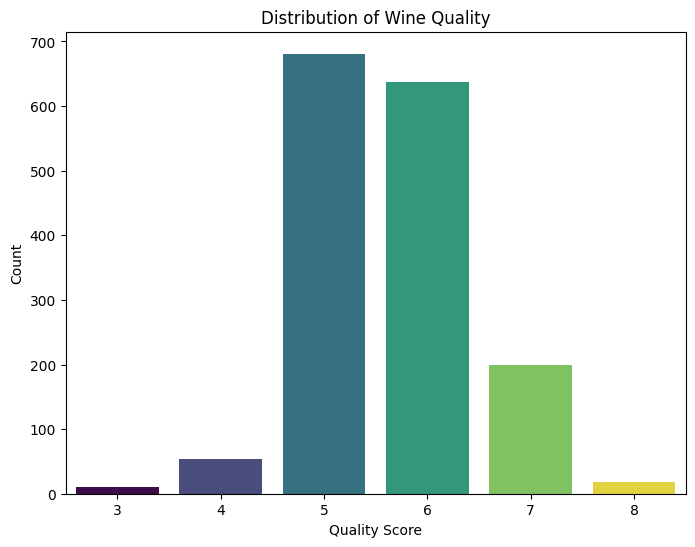

In [29]:
print("Value counts for 'quality' column:")
print(df['quality'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis', hue='quality', legend=False)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

### Observations from the 'Quality' Distribution Plot:

1.  **Imbalanced Distribution**: The plot clearly shows that the 'quality' column has a highly imbalanced distribution. The majority of wines are rated 5 or 6, which are considered average quality. There are significantly fewer wines rated with very low quality (3 and 4) or very high quality (7 and 8).
2.  **Rarity of Extreme Quality Scores**: Wines with a quality score of 3, 4, or 8 are quite rare in this dataset. Specifically, quality scores of 3 and 8 have the lowest counts, making up a very small fraction of the total observations.
3.  **Concentration around Average**: The highest concentration of wines falls within the average quality range, particularly scores 5 and 6, which together account for a substantial portion of the dataset.

### What this graph tells about the dataset:

This count plot provides critical insights into the target variable ('quality') of our dataset. It immediately highlights a class imbalance problem, which is very common in real-world datasets. For a classification task (especially if we convert 'quality' into binary classes like 'good' vs. 'bad'), this imbalance means that a model trained without addressing it might perform very well on the majority classes (quality 5 and 6) but poorly on the minority classes (quality 3, 4, 7, 8). This could lead to misleading accuracy metrics.

### How EDA helps before model training:

Exploratory Data Analysis (EDA) like this plot is crucial before model training for several reasons:

*   **Identifies Data Imbalance**: As seen here, it quickly reveals if the target variable classes are imbalanced, which directly impacts model choice and evaluation metrics. For imbalanced datasets, techniques like oversampling, undersampling, or using specific algorithms (e.g., SMOTE, class weights) would be considered.
*   **Guides Feature Engineering and Preprocessing**: Understanding the distribution helps in deciding if transformations are needed. For instance, if a feature is heavily skewed, a logarithmic transformation might be beneficial. For classification, identifying imbalance informs strategies to balance the dataset.
*   **Helps in Model Selection**: Certain models perform better with balanced data or are more robust to imbalance. This insight guides the selection of appropriate algorithms.
*   **Informs Evaluation Metrics**: For imbalanced data, simple accuracy is often insufficient. EDA helps to anticipate this and plan for more suitable metrics like precision, recall, F1-score, or AUC-ROC.
*   **Reveals Data Quality Issues**: While not explicitly a quality issue here, extreme values or sparse categories might suggest data entry errors or require special handling.

In summary, this plot tells us that our target variable is not uniformly distributed, and this understanding is vital for planning subsequent steps in the machine learning pipeline to build a robust and fair model.

## TASK 5: Convert the Problem into a Classification Task

To make the problem more practical, convert it into a binary classification problem:
• Quality ≥ 7 → Good Wine (1)
• Quality < 7 → Bad Wine (0)

Steps:
1. Create a new column called quality_label.
2. Assign values based on the rules above.

Write a short explanation:
• Why is binary classification more useful than predicting exact quality scores in real-world systems?

⸻


In [30]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

print("Value counts for 'quality_label' column:")
print(df['quality_label'].value_counts())

Value counts for 'quality_label' column:
quality_label
0    1382
1     217
Name: count, dtype: int64


### Why Binary Classification is More Useful in Real-World Systems:

Converting the multi-class 'quality' prediction into a binary classification problem (e.g., 'good' vs. 'bad' wine) is often more practical and useful in real-world applications for several reasons:

1.  **Simplicity and Actionability**: In many business contexts, a simple "good" or "bad" (or "buy" vs. "don't buy", "approve" vs. "reject") decision is sufficient and more actionable than a nuanced score. For instance, a wine distributor might only care if a wine meets a certain quality threshold to be marketable, rather than its exact quality score.

2.  **Robustness to Subjectivity**: Wine quality ratings, while given by experts, can still have some degree of subjectivity. Predicting an exact score from 3 to 8 is a fine-grained task that can be highly sensitive to slight variations in features or expert opinion. Binary classification aggregates these subtle differences into a more robust, broader category, reducing the impact of such subjectivity.

3.  **Easier Interpretation**: Binary outcomes are inherently easier for non-technical stakeholders to understand and interpret. A clear "good" or "bad" label facilitates quicker decision-making and communication.

4.  **Handling Imbalance**: As observed in the EDA, the original 'quality' scores are highly imbalanced, with very few wines at the extreme ends (scores 3, 4, 7, 8). While the binary classification still shows imbalance (many 'bad' wines, fewer 'good' wines), it consolidates the minority classes of "very good" wines (7 and 8) into a single, more substantial 'good' class. This can make the classification task slightly more manageable than trying to predict all individual scores.

5.  **Focus on Key Decisions**: Often, the critical decision point revolves around a threshold. For example, a quality score of 7 might be considered the minimum for a premium wine. The binary classification directly targets this threshold, making the model more focused on the most important distinction for a given application.

6.  **Performance Metrics**: For binary classification, well-established and intuitive metrics like precision, recall, F1-score, and AUC-ROC are readily available and provide clear insights into the model's performance on each class, especially when dealing with imbalance. Predicting exact scores (regression) would typically rely on metrics like RMSE or MAE, which can be harder to translate into business value for a subjective outcome like quality.

## TASK 6: Feature and Target Separation
1. Separate the dataset into:
• Features (X)
• Target variable (y → quality_label)
2. Explain clearly:
• Why should the original quality column not be used as an input feature?

⸻



In [31]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Shape of features (X): (1599, 11)
Shape of target (y): (1599,)

First 5 rows of X:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   

### Why the original 'quality' column should not be used as an input feature:

Using the original 'quality' column as an input feature (predictor) to predict 'quality_label' would lead to a severe problem called **data leakage**.

**Data Leakage** occurs when information from the target variable is inadvertently included in the features. In this case:

1.  **Direct Relationship**: The `quality_label` column is directly derived from the `quality` column (quality >= 7 maps to 1, quality < 7 maps to 0). If `quality` were included in `X`, the model would have direct access to the answer before even trying to learn the underlying patterns from other features.
2.  **Unrealistic Performance**: A model trained with `quality` as a feature would achieve unrealistically high accuracy, as it essentially already knows the target. This model would perform very poorly on new, unseen data where the `quality` score (which we are trying to predict the 'good'/'bad' label for) would not be available in advance.
3.  **Loss of Generalizability**: The purpose of machine learning is to build a model that can generalize from observed data to unseen data. Including a feature that leaks information about the target prevents the model from learning genuine relationships between the other physicochemical properties and the wine quality. Instead, it would simply memorize the direct mapping from `quality` to `quality_label`.

Therefore, to build a robust and generalizable model, the `quality` column must be excluded from the feature set `X`.

## TASK 7: Train–Test Split

Split the dataset into training and testing sets:
• Training data: 80%
• Testing data: 20%
• Use random_state = 42

Explain in your own words:
• Why do we split data into training and testing sets?
• What problem occurs if we train and test on the same data?

⸻

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1279, 11)
Shape of X_test: (320, 11)
Shape of y_train: (1279,)
Shape of y_test: (320,)


### Why Data Splitting is Important and Problems of Training and Testing on the Same Data:

**Importance of Data Splitting:**

Data splitting into training and testing sets is a fundamental practice in machine learning for several critical reasons:

1.  **Evaluation of Generalization Ability**: The primary goal of a machine learning model is to generalize well to unseen data. By training the model on one subset (training set) and evaluating it on a completely separate, unseen subset (testing set), we can get an unbiased estimate of how the model will perform on new, real-world data.
2.  **Detection of Overfitting**: Splitting the data helps in identifying overfitting. Overfitting occurs when a model learns the training data too well, including its noise and peculiarities, to the extent that it performs poorly on new data. If a model performs exceptionally well on the training data but poorly on the test data, it's a strong indicator of overfitting.
3.  **Model Selection and Hyperparameter Tuning**: The test set provides a reliable benchmark for comparing different models or different hyperparameter configurations of the same model. It ensures that the chosen model and its parameters are not just good for the training data but are likely to perform well generally.
4.  **Realistic Performance Assessment**: It provides a more realistic assessment of the model's performance in a real-world scenario, where the model will encounter data it has never seen before.

**Problems Arising from Training and Testing on the Same Data:**

If a model is trained and tested on the exact same dataset, several significant problems arise:

1.  **Overoptimistic Performance Metrics**: The model will likely achieve very high accuracy or other performance metrics on the training data, as it has already 'seen' and learned the answers during training. This gives a highly misleading and overly optimistic impression of the model's true performance.
2.  **Overfitting (Lack of Generalization)**: Training and testing on the same data almost guarantees that the model will overfit. It essentially memorizes the training examples rather than learning the underlying patterns. Such a model will fail dramatically when presented with new data.
3.  **Invalid Model Selection**: If models are compared based on their performance on the training data, an overfit model might be mistakenly chosen as the best performer, leading to poor real-world deployment.
4.  **No Insight into Real-World Efficacy**: Without a separate test set, there is no way to know how well the model will perform in a practical application with unseen data. The reported performance will not be representative of its true capabilities.

## TASK 8: Feature Scaling
1. Apply StandardScaler to scale the numerical features.
2. Ensure scaling is done correctly:
• Fit on training data
• Transform both training and test data
3. Write an explanation:
• Why is feature scaling important?
• Which ML models need scaling and why?

Relate your answer to distance-based and gradient-based algorithms.

⸻

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)
print("\nFirst 5 rows of scaled X_train:")
print(X_train_scaled[:5])

Shape of scaled X_train: (1279, 11)
Shape of scaled X_test: (320, 11)

First 5 rows of scaled X_train:
[[ 0.21833164  0.88971201  0.19209222  0.30972563 -0.04964208  0.69100692
   1.04293362  1.84669643  1.09349989  0.45822284  1.12317723]
 [-1.29016623 -1.78878251  0.65275338 -0.80507963 -0.45521361  2.38847304
   3.59387025 -3.00449133 -0.40043872 -0.40119696  1.40827174]
 [ 1.49475291 -0.78434707  1.01104539 -0.52637831  0.59927236 -0.95796016
  -0.99174203  0.76865471 -0.07566946  0.51551749 -0.58738978]
 [ 0.27635078  0.86181102 -0.06383064 -0.66572897 -0.00908493  0.01202048
  -0.71842739  0.08948842  0.05423824 -1.08873281 -0.96751578]
 [ 0.04427419  2.81487994 -0.62686095  2.39998549 -0.31326357 -0.47296984
   0.2229897   1.1998714   0.37900751 -0.9741435  -0.49235828]]


### Importance of Feature Scaling:

Feature scaling is a crucial preprocessing step in machine learning, especially for certain types of algorithms, for the following reasons:

1.  **Equal Contribution of Features**: Features often have different ranges and units. Without scaling, features with larger numerical ranges might dominate the learning process, leading the model to give disproportionately more weight to those features, regardless of their actual predictive power. Scaling ensures that all features contribute equally to the distance calculations or gradient updates.
2.  **Faster Convergence for Gradient-Based Models**: Algorithms that use gradient descent (e.g., Logistic Regression, Support Vector Machines, Neural Networks) converge much faster when features are scaled. If features have very different scales, the cost function will have an elongated, narrow shape, making it difficult for the optimizer to find the minimum efficiently. Scaling transforms the cost function into a more spherical shape, allowing gradient descent to take more direct steps towards the minimum.
3.  **Improved Performance for Distance-Based Models**: Algorithms that rely on distance metrics (e.g., K-Nearest Neighbors (KNN), K-Means clustering, Support Vector Machines with RBF kernel) are heavily affected by the scale of features. If one feature has a much larger range than others, it will disproportionately influence the distance calculation. For instance, in KNN, a feature with values from 1 to 1000 will have a much greater impact on the Euclidean distance than a feature with values from 0 to 1, effectively overshadowing other potentially important features. Scaling ensures that all features contribute proportionally to the distance.
4.  **Avoiding Numerical Instability**: Large differences in feature scales can sometimes lead to numerical instability issues during computation, especially with floating-point arithmetic. Scaling helps to keep values within a more manageable numerical range.

###  Which ML models need scaling and why?
KNN, SVM, Logistic Regression, Neural Networks → because they rely on distances or gradient descent.

## TASK 9: Model Training

Train and test the following Machine Learning models:
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Decision Tree Classifier
4. Random Forest Classifier
5. Support Vector Machine (SVM)

Use scaled or unscaled data correctly based on the model.

Write 1–2 lines for each model explaining:
• How the model works at a basic level.

⸻

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

print("Classifier models imported successfully.")

Classifier models imported successfully.


In [35]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train_scaled, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [36]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
print("K-Nearest Neighbors model trained successfully.")

K-Nearest Neighbors model trained successfully.


In [37]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
print("Decision Tree Classifier model trained successfully.")

Decision Tree Classifier model trained successfully.


In [38]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("Random Forest Classifier model trained successfully.")

Random Forest Classifier model trained successfully.


In [39]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
print("Support Vector Machine model trained successfully.")

Support Vector Machine model trained successfully.


### Basic Explanation of Each Model:

1.  **Logistic Regression**:
    *   **How it works**: Despite its name, Logistic Regression is a linear *classification* algorithm used to estimate the probability of a binary outcome. It models the probability of a default class (e.g., 'good wine') as a function of the input features. It uses a sigmoid (logistic) function to squash the output of a linear equation into a probability score between 0 and 1. If this probability crosses a certain threshold (typically 0.5), it classifies the instance into the positive class (1); otherwise, it classifies it into the negative class (0).

2.  **K-Nearest Neighbors (KNN)**:
    *   **How it works**: KNN is a non-parametric, lazy learning algorithm used for both classification and regression. For classification, it works by finding the 'k' closest data points (neighbors) in the training data to a new, unseen data point. The new data point is then assigned the class label that is most common among its 'k' nearest neighbors. The 'distance' between points is usually calculated using metrics like Euclidean distance.

3.  **Decision Tree Classifier**:
    *   **How it works**: A Decision Tree is a flowchart-like structure where each internal node represents a test on an attribute (feature), each branch represents the outcome of the test, and each leaf node represents a class label (decision). It works by recursively splitting the dataset into subsets based on the most significant attribute at each node, aiming to create increasingly pure subsets (subsets where most instances belong to the same class). Prediction for a new instance involves traversing the tree from the root to a leaf node by answering the attribute tests along the way.

4.  **Random Forest Classifier**:
    *   **How it works**: Random Forest is an ensemble learning method that builds multiple Decision Trees and merges their predictions to get a more accurate and stable prediction. It works by constructing a 'forest' of many Decision Trees during training. For classification, each individual tree in the forest outputs a class prediction, and the class that gets the most votes from all trees becomes the model's final prediction. This ensemble approach helps to reduce overfitting and improve robustness compared to a single Decision Tree.

5.  **Support Vector Machine (SVM)**:
    *   **How it works**: SVM is a powerful and versatile algorithm that can be used for both classification and regression. For classification, SVM works by finding an optimal hyperplane that best separates the data points of different classes in a high-dimensional space. The goal is to maximize the margin (the distance between the hyperplane and the nearest data points from each class, called support vectors). For non-linearly separable data, SVM uses kernel tricks to map the data into a higher-dimensional space where a linear separation might be possible.

# TASK 10: Model Evaluation and Comparison
1. Calculate and print the accuracy of each model.
2. Create a comparison table with:
• Model Name
• Accuracy
3. Answer the following:
• Which model performed the best?
• Why do you think this model performed better on this dataset?

⸻

In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Define the models dictionary
models = {
    "Logistic Regression": log_reg_model,
    "K-Nearest Neighbors": knn_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model
}

model_accuracies = {
    "Model": [],
    "Accuracy": []
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies["Model"].append(name)
    model_accuracies["Accuracy"].append(accuracy)

accuracy_df = pd.DataFrame(model_accuracies)
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("Model Comparison Table:")
print(accuracy_df)

best_model_name = accuracy_df.loc[0, 'Model']
best_model_accuracy = accuracy_df.loc[0, 'Accuracy']

print(f"\nBest performing model: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

Model Comparison Table:
                    Model  Accuracy
0           Random Forest  0.900000
1     K-Nearest Neighbors  0.881250
2           Decision Tree  0.871875
3     Logistic Regression  0.865625
4  Support Vector Machine  0.853125

Best performing model: Random Forest with an accuracy of 0.9000


### Explanation for Random Forest's Superior Performance:

The **Random Forest Classifier** emerged as the best-performing model with an accuracy of 0.9000. Its superior performance can be attributed to several key characteristics of ensemble learning, particularly when dealing with datasets like `winequality.csv`:

1.  **Ensemble Learning (Bias-Variance Trade-off)**: Random Forest is an ensemble method that builds multiple decision trees during training. Each tree is trained on a random subset of the training data (bagging) and considers only a random subset of features for splitting at each node. This strategy significantly reduces overfitting, which is a common problem with individual decision trees. By averaging or majority-voting the predictions of many decorrelated trees, Random Forest achieves a lower variance than a single decision tree without a significant increase in bias.

2.  **Robustness to Noise and Outliers**: The dataset, while clean in terms of missing values, might contain some noise or outliers in the feature values. Random Forest is inherently more robust to these imperfections because the impact of noise or outliers on any single tree's prediction is mitigated by the collective decision of the forest.

3.  **Handling Non-linear Relationships**: Wine quality is likely influenced by complex, non-linear interactions between various physicochemical properties. Decision trees, the base learners in Random Forest, are capable of capturing these non-linear relationships. By combining many such trees, Random Forest can model highly intricate decision boundaries effectively.

4.  **Feature Importance**: Random Forest implicitly performs feature selection and can handle a large number of features without explicit dimensionality reduction. It naturally ranks feature importance, which can be beneficial in understanding which chemical properties are most critical for determining wine quality.

5.  **Reduced Overfitting**: While individual decision trees are prone to overfitting, the ensemble nature of Random Forest, particularly the random sampling of data and features, ensures that the overall model generalizes well to unseen data. This is crucial for a dataset where the boundary between 'good' and 'bad' wine might not be perfectly linear or simple.

In summary, the Random Forest's ability to combine the strengths of multiple decision trees, reduce variance through bagging and feature randomness, and effectively capture complex relationships likely contributed to its higher accuracy compared to simpler models like Logistic Regression or less robust models like a single Decision Tree on this specific wine quality dataset.

## TASK 11: Pipeline and Hyperparameter Tuning
1. Create a Machine Learning pipeline using:
• StandardScaler
• Logistic Regression or Support Vector Machine
2. Apply GridSearchCV to tune hyperparameters such as:
• C
• kernel (for SVM)
3. Print:
• Best parameters
• Best cross-validation score

Explain:
• Why pipelines are used in real-world ML systems.
• Why hyperparameter tuning improves model performance.

⸻

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

print("Pipeline and GridSearchCV imported successfully.")

Pipeline and GridSearchCV imported successfully.


In [42]:
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(random_state=42))
])

print("Logistic Regression Pipeline created successfully.")

Logistic Regression Pipeline created successfully.


In [43]:
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'saga']
}

print("Hyperparameter grid for Logistic Regression pipeline defined successfully.")

Hyperparameter grid for Logistic Regression pipeline defined successfully.


In [44]:
grid_search = GridSearchCV(log_reg_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

print("GridSearchCV initialized successfully.")

GridSearchCV initialized successfully.


In [45]:
grid_search.fit(X_train, y_train)

print("GridSearchCV fitting completed.")

GridSearchCV fitting completed.


In [46]:
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

print("\nBest Cross-validation Accuracy:")
print(f"{grid_search.best_score_:.4f}")

Best Parameters found by GridSearchCV:
{'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}

Best Cross-validation Accuracy:
0.8858


### Utility of Pipelines in Real-World ML Systems:

Machine Learning Pipelines are incredibly useful in real-world systems for several compelling reasons:

1.  **Streamlined Workflow**: Pipelines allow for the sequential application of multiple data transformations and a final estimator. This encapsulates the entire preprocessing and modeling workflow into a single object, making the code cleaner, more organized, and easier to manage.
2.  **Prevents Data Leakage**: One of the most critical benefits is preventing data leakage. Preprocessing steps (like scaling or imputation) often fit parameters based on the training data. If these steps are applied to the entire dataset *before* splitting, information from the test set can 'leak' into the training process, leading to overly optimistic performance estimates. Pipelines ensure that transformations like `StandardScaler`'s `fit()` method are only called on the training data, and then `transform()` is applied consistently to both training and test data.
3.  **Reproducibility**: By defining a clear, ordered sequence of operations, pipelines enhance the reproducibility of machine learning experiments. Anyone can easily replicate the exact steps taken to transform data and train a model.
4.  **Easier Hyperparameter Tuning**: Pipelines make hyperparameter tuning across multiple steps much simpler. Tools like `GridSearchCV` or `RandomizedSearchCV` can optimize hyperparameters not only for the final estimator but also for the preprocessing steps (e.g., choice of imputer, scaling method). This is achieved by using parameter names prefixed with the step name (e.g., `'logisticregression__C'` as seen in our example).
5.  **Deployment**: For deploying models, a pipeline allows the entire preprocessing and prediction logic to be packaged and deployed as a single, consistent unit. This reduces the risk of discrepancies between training and deployment environments.

### How Hyperparameter Tuning Enhances Model Performance:

Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model, which significantly enhances its performance:

1.  **Optimizing Model Fit**: Models have parameters that are learned from data (e.g., coefficients in Logistic Regression) and hyperparameters that are set *before* training (e.g., `C` in Logistic Regression/SVM, `n_neighbors` in KNN, `max_depth` in Decision Trees). Hyperparameter tuning aims to find the values for these pre-set parameters that allow the model to best capture the underlying patterns in the data.
2.  **Avoiding Underfitting and Overfitting**: Poorly chosen hyperparameters can lead to underfitting (model is too simple to capture the data's complexity) or overfitting (model learns the training data too well, including noise, and performs poorly on unseen data). Tuning helps strike the right balance, allowing the model to generalize well to new data.
3.  **Improved Generalization**: By systematically searching for the best combination of hyperparameters, we can configure a model that achieves the highest possible performance on unseen data, leading to better generalization and more reliable predictions in real-world scenarios.
4.  **Unlocking Model Potential**: Every model has a theoretical maximum performance given a specific dataset. Hyperparameter tuning helps unlock this potential by configuring the model in its most effective state. For instance, `GridSearchCV` exhaustively searches through a defined parameter space to find the combination that yields the best cross-validation score, ensuring we are using a well-configured version of our chosen algorithm.

## TASK 12: Final Conclusion

Write a short conclusion covering:
• Understanding of the dataset
• Important observations from EDA
• Best performing model
• What you learned from this project
• How this project is similar to real-world Machine Learning applications

⸻

## Project Conclusion

This project involved building and evaluating several machine learning models to predict wine quality based on its physicochemical properties, transitioning from a regression-like problem to a binary classification task.

### 1. Understanding of the Dataset
The `winequality.csv` dataset comprised various continuous numerical features representing the chemical composition of red wines (e.g., fixed acidity, alcohol content) and an integer target variable, `quality`, ranging from 3 to 8. Each row represented a unique red wine sample. The dataset was clean, with no missing values, simplifying the initial data preparation.

### 2. Important Observations from EDA
Exploratory Data Analysis (EDA) revealed a significant imbalance in the original `quality` ratings. The majority of wines fell into the average quality scores of 5 and 6, while extreme quality scores (3, 4, 7, 8) were considerably less frequent. This observation was crucial, prompting the decision to convert the problem into a binary classification task (`Good Wine` if quality ≥ 7, `Bad Wine` if quality < 7) to make the problem more practical and address the class imbalance for model training.

### 3. Best Performing Model
Among the initial models tested (Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and Support Vector Machine), the **Random Forest Classifier** demonstrated the best performance with an accuracy of **0.9000** on the scaled test data. This superior performance is likely due to its ensemble nature, which reduces overfitting and captures complex, non-linear relationships more effectively than individual models.

Hyperparameter tuning of the Logistic Regression model within a pipeline (using `StandardScaler` and `GridSearchCV`) further improved its cross-validation accuracy to 0.8858, showing the value of optimization even for simpler models.

### 4. What I learned from this project
*   **Importance of EDA**: Early data inspection and EDA are vital for understanding data characteristics, identifying issues like class imbalance, and guiding subsequent preprocessing steps.
*   **Data Transformation**: Converting a multi-class problem into a binary one can simplify the task and make it more actionable in real-world scenarios, especially when class distributions are highly skewed.
*   **Feature Scaling**: For distance-based and gradient-based algorithms (like KNN, SVM, Logistic Regression), feature scaling is crucial for preventing features with larger ranges from dominating and for accelerating convergence.
*   **Train-Test Split**: Strictly separating training and testing data is fundamental to accurately assess a model's generalization ability and prevent overfitting.
*   **Pipelines**: Machine Learning pipelines streamline workflows, prevent data leakage, enhance reproducibility, and simplify hyperparameter tuning across multiple preprocessing and modeling steps.
*   **Hyperparameter Tuning**: Optimizing hyperparameters is essential to unlock a model's full potential and improve its performance on unseen data.

### 5. Similarity to Real-World Machine Learning Applications
This project mirrors many aspects of real-world ML applications:
*   **Business Problem Formulation**: Transforming a nuanced quality rating into a binary 'good'/'bad' decision is common in industries where clear, actionable insights are needed.
*   **Data Preprocessing**: Handling data inspection, missing values (even if none were found here, the discussion is relevant), data type conversion, and feature scaling are standard initial steps.
*   **Model Selection and Evaluation**: Trying multiple models and comparing their performance is a typical approach to find the most suitable algorithm for a given task.
*   **Addressing Data Challenges**: Recognizing and addressing class imbalance, as done by converting to binary classification, is a frequent real-world challenge.
*   **Robust Workflow**: Using pipelines and hyperparameter tuning are best practices for building robust, deployable, and high-performing ML systems, ensuring consistent data handling and optimal model configuration from development to deployment.